In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [50]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from audiovocana.color import COLORS

YEAR = 17
CLUSTERS = range(8, 9)
MOTHERS = ['E', 'U']
FILTERS = {'vocalization': 1, 'year': 17}
RESULTS_FOLDER = "/home/utilisateur/Desktop/palomars/usv-experiments/full-dataset/results"
RESULTS_FOLDER = os.path.join(
    RESULTS_FOLDER,
    '_'.join([f"{k}:{v}" for k, v in FILTERS.items()]),
    'clustering',
    'cluster_assigns'
)
CSV_PATH = os.path.join(RESULTS_FOLDER, "mean_stft-ward-euclidean.csv")

In [51]:
for c in CLUSTERS:
    os.makedirs(os.path.join(RESULTS_FOLDER, 'counts', f'clust{c}'), exist_ok=True)

In [52]:
df = pd.read_csv(CSV_PATH)
df = df.assign(mother=df.mother.apply(lambda m: m[2]))
df.head()

,vocalization,mother,year,nest,postnatalday,event,recording,clust2,clust3,clust4,clust5,clust6,clust7,clust8
0,1,U,17,b'U4',5,3,866,1,1,2,2,3,4,4
1,1,U,17,b'U4',5,6,866,1,1,2,2,3,4,4
2,1,U,17,b'U4',5,5,866,1,1,2,2,3,4,4
3,1,U,17,b'U4',5,10,866,1,1,2,2,3,4,4
4,1,U,17,b'U4',5,9,866,1,1,2,2,2,3,3


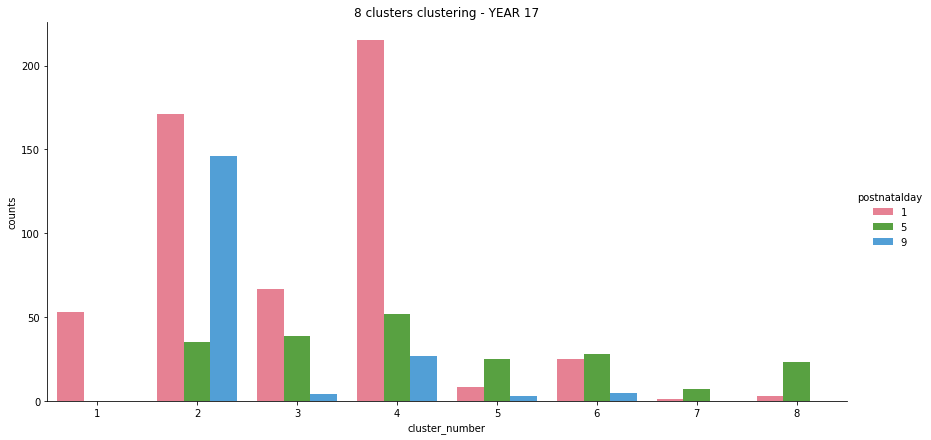

In [73]:
for c in CLUSTERS:
        tmp = df[['postnatalday', f"clust{c}", "event"]]
        tmp = tmp.groupby(['postnatalday', f"clust{c}"]).count()
        tmp.reset_index(inplace=True)
        tmp.rename({'event': 'counts', f"clust{c}": "cluster_number"}, axis=1, inplace=True)
        tmp.to_csv(os.path.join(RESULTS_FOLDER, 'counts',  f'clust{c}', f'counts:clust{c}.csv'), index=False)
        
        g = sns.catplot(x="cluster_number", y="counts", hue="postnatalday", data=tmp,
                height=6, aspect=2, kind="bar", palette=COLORS["postnatalday"])
        plt.title(f'{c} clusters clustering - YEAR {YEAR}')

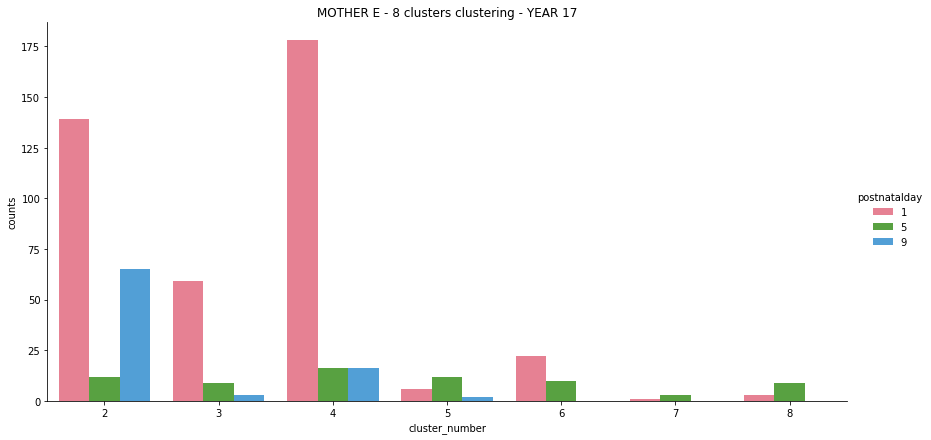

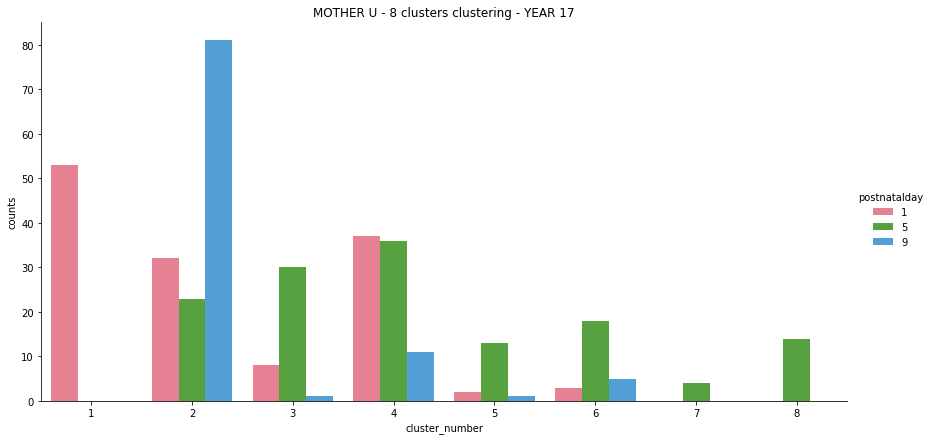

In [72]:
for c in CLUSTERS:
    for m in MOTHERS:
        tmp = df[['mother', 'postnatalday', f"clust{c}", "event"]]
        tmp = tmp[tmp.mother == m].drop('mother', axis=1)

        tmp = tmp.groupby(['postnatalday', f"clust{c}"]).count()
        tmp.reset_index(inplace=True)
        tmp.rename({'event': 'counts', f"clust{c}": "cluster_number"}, axis=1, inplace=True)
        tmp.to_csv(os.path.join(RESULTS_FOLDER, 'counts',  f'clust{c}', f'counts-mother:{m}_clust{c}.csv'), index=False)
        
        g = sns.catplot(x="cluster_number", y="counts", hue="postnatalday", data=tmp,
                height=6, aspect=2, kind="bar", palette=COLORS["postnatalday"])
        plt.title(f'MOTHER {m} - {c} clusters clustering - YEAR {YEAR}')